In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import sklearn as sk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model.logistic import LogisticRegression

%matplotlib inline

In [3]:
rouge = [[1,4], [2,3], [3,2], [4,1], [2,4], [3,3], [4,2] ]
bleu = [[1,2], [2,1], [3,0], [4,-1], [1,1], [2,0], [2,-1]]

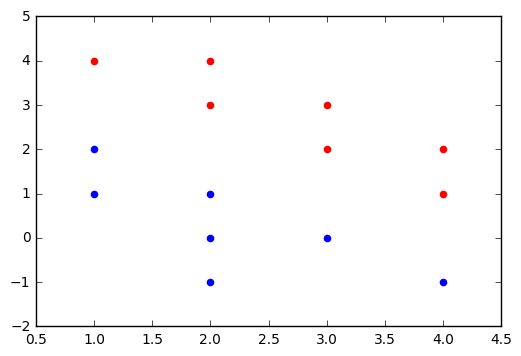

In [4]:
plt.scatter([x for x,y in rouge], [y for x,y in rouge], color='red')
plt.scatter([x for x,y in bleu], [y for x,y in bleu], color='blue')

Nous pouvons indiquer l'hyperplane séparateur (ci-bas).

* à discuter : pourquoi y a-t-il un point mal-classifié?  (La réponse est bêtement facile mais assez difficile à trouver la première fois.  N'hésitez pas à discuter sur slack.)
* jouez avec les données

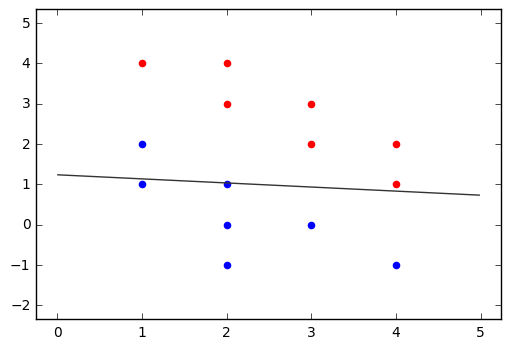

In [5]:
# Inspired by https://stackoverflow.com/questions/20045994/how-do-i-plot-the-decision-boundary-of-a-regression-using-matplotlib
# and http://stackoverflow.com/questions/28256058/plotting-decision-boundary-of-logistic-regression

X = np.array(rouge + bleu)
y = [1] * len(rouge) + [0] * len(bleu)

logreg = LogisticRegression()
logreg.fit(X, y)

xx, yy = np.mgrid[0:5:.01, -2:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = logreg.predict_proba(grid)[:, 1].reshape(xx.shape)

fig, ax = plt.subplots()
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

plt.scatter([x for x,y in rouge], [y for x,y in rouge], color='red')
plt.scatter([x for x,y in bleu], [y for x,y in bleu], color='blue')
plt.show()


# Un exemple plus approfondi

Exercices
* Jouez avec le code pour comprendre la forme de chaque variable.
* Découvrez le sens de "target".

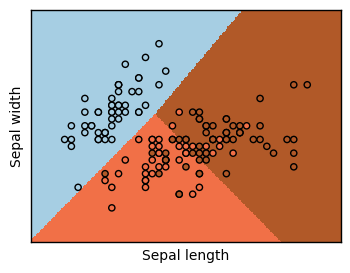

In [5]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets

# Import some data to play with.
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

h = .02  # step size in the mesh

logreg = linear_model.LogisticRegression(C=1e5)

# We create an instance of Neighbours Classifier and fit the data.
logreg.fit(X, Y)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, m_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points.
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Détection de spam avec la régression logistique

Il aurait fallu télécharger le corpus de spam [ici](http://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection), puis l'unzipper dans le répertoire `spam-corpus`.  Mais ici c'est déjà fait.

In [6]:
df = pd.read_csv('spam-corpus/SMSSpamCollection', delimiter='\t', header=None)
print(df.head())
print('\n')
print('Number of spam messages: {n}'.format(n=df[df[0] == 'spam'][0].count()))
print('Number of ham messages: {n}'.format(n=df[df[0] == 'ham'][0].count()))

IOError: File spam-corpus/SMSSpamCollection does not exist

Il nous faut d'abord des critères (features).  Puis nous allons utiliser TF-IDF pour trouver les mots les plus représentatifs des sms spam et ham.

* Explorez les training data et test data, cru et cuit.
* Pourquoi disons-nous `fit_transform()` pour les _training data_, mais `transform()` pour les _test data_?

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score

X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[1], df[0])
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train_raw)
X_test = vectorizer.transform(X_test_raw)

Enfin, nous créeons un classifieur par régression logistique.  Comme tout classifieur en scikit-learn, il nous propose `fit()` et `predict()`.  Il faut toujours visualiser nos données et nos résultats, ce que nous faisons.

In [ ]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
predictions = classifier.predict(X_test)
num_to_show = 5
for msg, prediction in zip(X_test_raw[:num_to_show], predictions[:num_to_show]):
    print('Prediction: {pred}.\nMessage: {msg}\n'.format(
           pred=prediction, msg=msg))

# Métriques de performance

OK, nous avons classifié les messages, mais avec quel taux de précision?

In [ ]:
from sklearn.metrics import confusion_matrix

yy_test = [0, 0, 0, 0, 0, 1, 1, 1, 1, 1]
yy_pred = [0, 1, 0, 0, 0, 0, 0, 1, 1, 1]
confusion = confusion_matrix(yy_test, yy_pred)
print(confusion)
plt.matshow(confusion)
plt.title('Confusion matrix')
plt.gray()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Ou si on voudrait que le noir nous montre les plus communs :
invert_colors = np.ones(confusion.shape) * confusion.max()
plt.matshow(invert_colors - confusion)
plt.title('Confusion matrix')
plt.gray()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

# Exercice

* Qu'est-ce qui est la matrice de confusion pour notre classifieur de spam?

# Cross validation

In [ ]:
good_scores = cross_val_score(classifier, X_train, y_train, cv=5)
random_X_train = np.random.rand(X_train.shape[0], X_train.shape[1])
bad_scores = cross_val_score(classifier, random_X_train, y_train, cv=5)
print('good', good_scores)
print('bad', bad_scores)